In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

In [4]:
from spaceoracle.models.estimators import GCNNWR 
from spaceoracle.tools.data import load_example_slideseq, filter_adata
from spaceoracle.tools.network import GeneRegulatoryNetwork

which: no R in (/ihome/crc/install/cuda/11.8/bin:/ihome/crc/install/pytorch/2.0.1/python3.10/bin:/ihome/ylee/kor11/miniforge3/condabin:/ihome/ylee/kor11/.cargo/bin:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/ihome/crc/pipx/bin:/ihome/ylee/kor11/.npm/bin:/ihome/ylee/kor11/.local/bin:/ihome/ylee/kor11/bin)


In [5]:
slideseq_data = load_example_slideseq('../data/slideseq/')
slideseq_data

[AnnData object with n_obs × n_vars = 50058 × 19041
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 41361 × 18972
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 30242 × 25343
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 39721 × 24649
     obs: 'cluster'
     uns: 'cluster_colors'
     obsm: 'X_spatial', 'spatial']

In [6]:
adata = slideseq_data[3].copy()

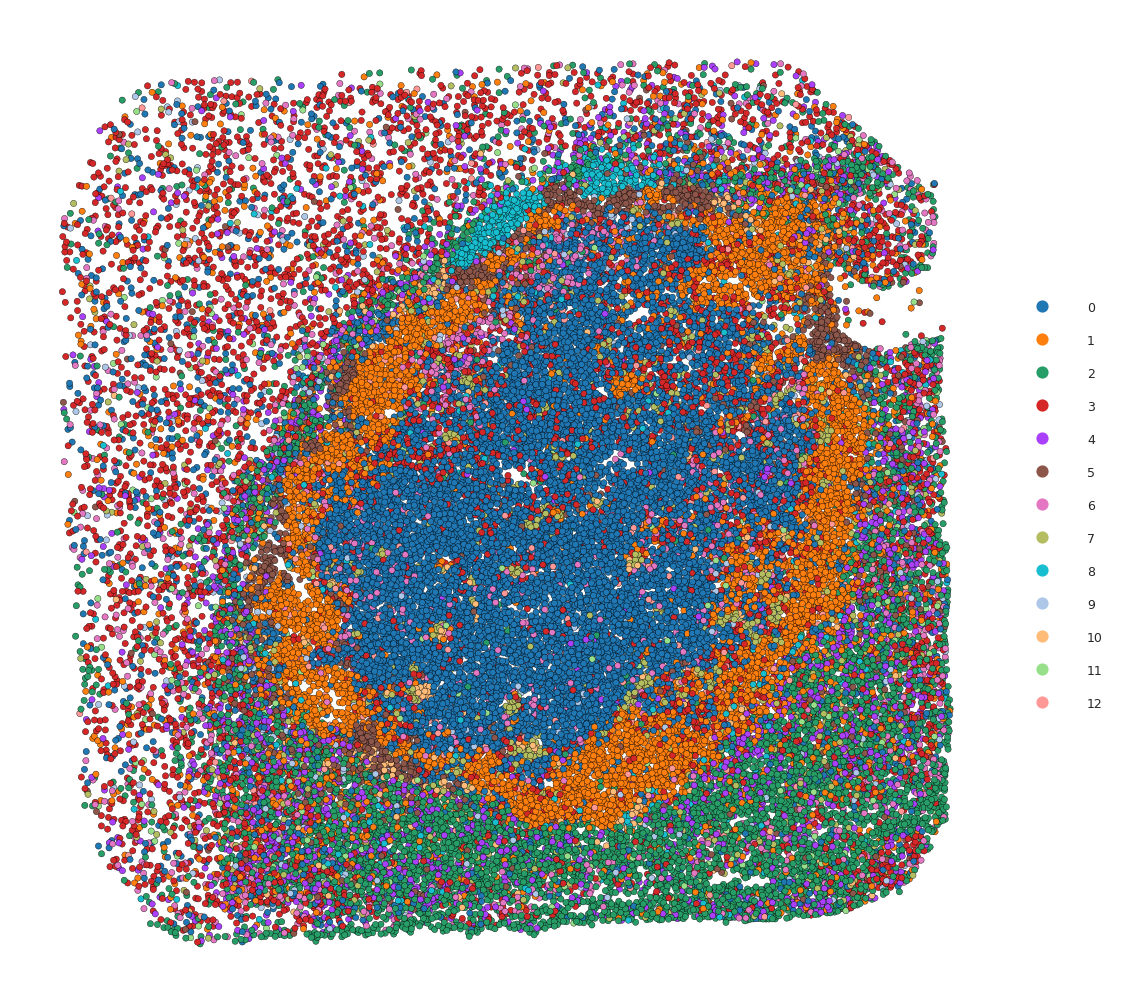

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color='cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15)

fig = plt.gcf()
ax = plt.gca()

# Adjust the legend size
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(5)

for handle in legend.legendHandles:
    handle._sizes = [15]

plt.title('')
plt.axis('off')
plt.show()

In [8]:
adata = filter_adata(adata, min_counts=100)

In [9]:
adata

View of AnnData object with n_obs × n_vars = 25074 × 2000
    obs: 'cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'log1p', 'hvg'
    obsm: 'X_spatial', 'spatial'
    layers: 'raw_count'

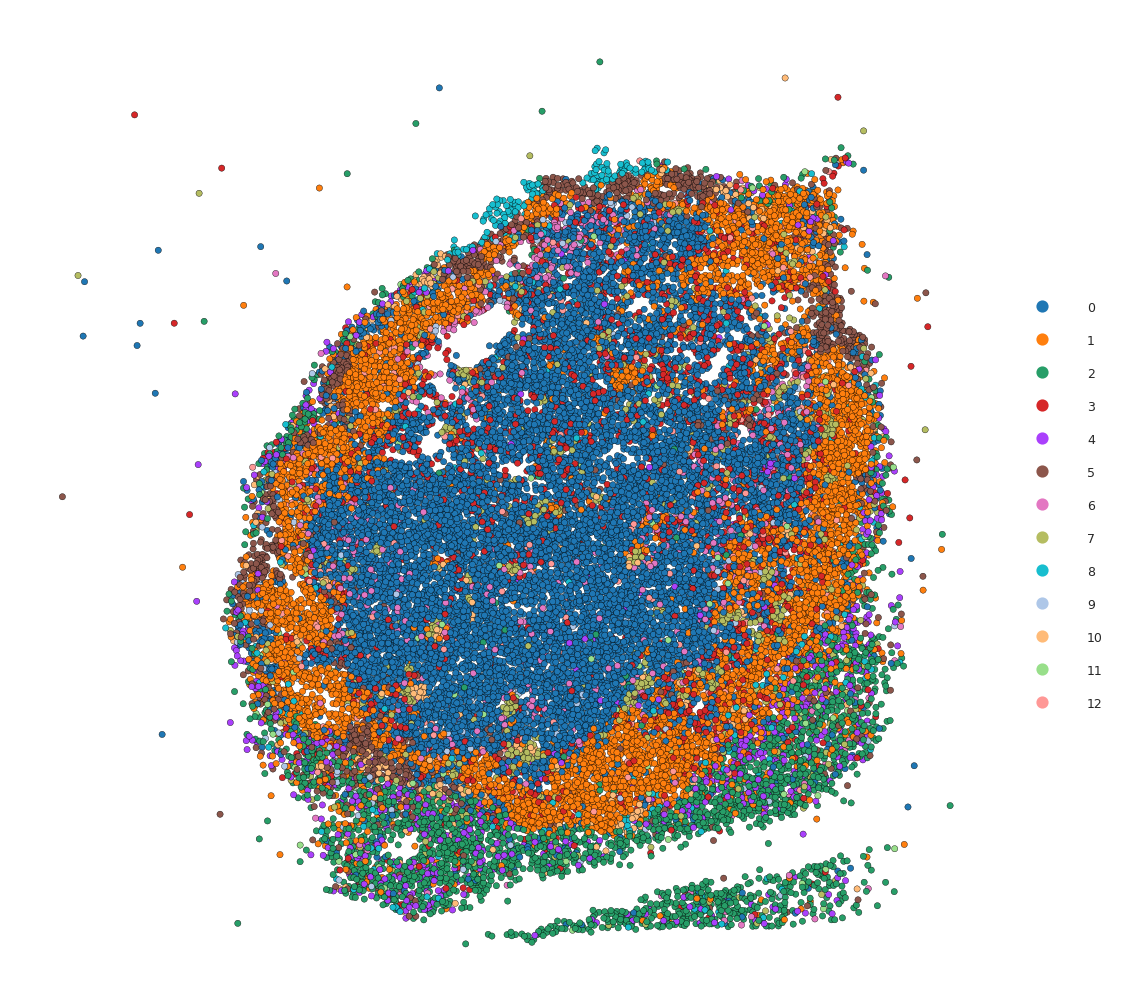

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color='cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15)

fig = plt.gcf()
ax = plt.gca()

# Adjust the legend size
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(5)

for handle in legend.legendHandles:
    handle._sizes = [15]

plt.title('')
plt.axis('off')
plt.show()

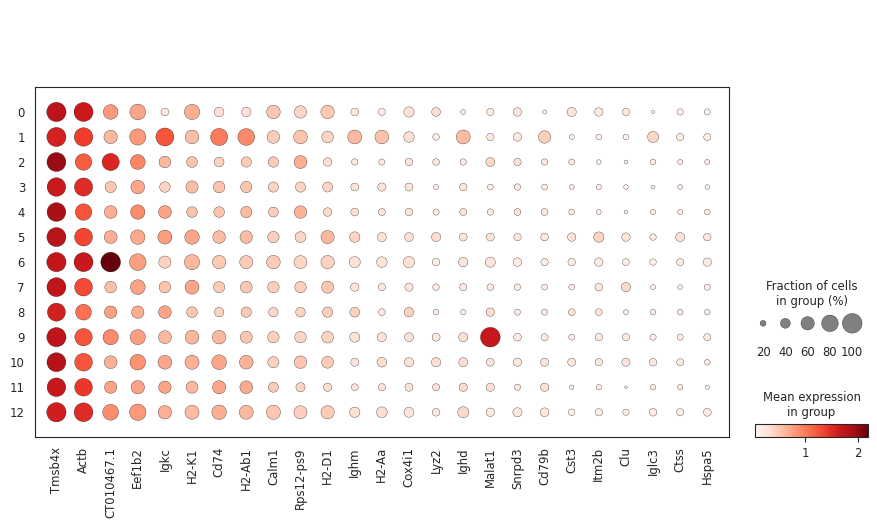

In [11]:
plt.rcParams["figure.figsize"] = (1, 1)
plt.rcParams['figure.dpi'] = 100
sc.pl.dotplot(adata, var_names=adata.var.means.sort_values(ascending=False)[:25].index, groupby='cluster')

In [12]:
adata.var.means.sort_values(ascending=False)[:15]

Tmsb4x        1.874657
Actb          1.638008
CT010467.1    1.169095
Eef1b2        0.951302
Igkc          0.888813
H2-K1         0.801896
Cd74          0.733329
H2-Ab1        0.720957
Calm1         0.624446
Rps12-ps9     0.608367
H2-D1         0.594381
Ighm          0.495780
H2-Aa         0.413201
Cox4i1        0.412551
Lyz2          0.398125
Name: means, dtype: float64

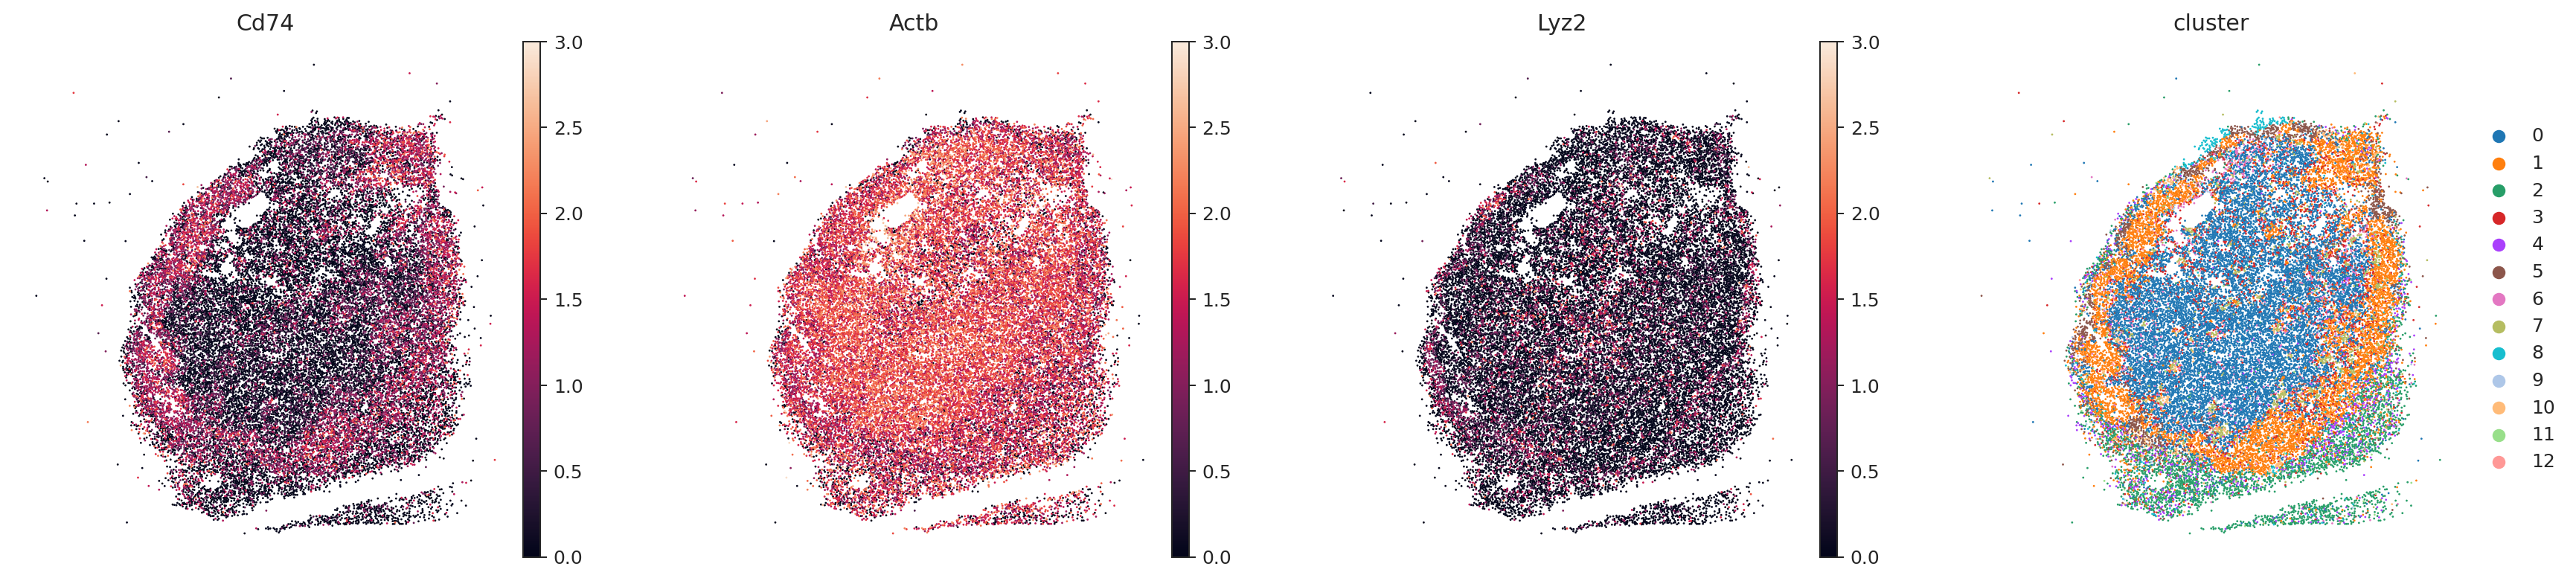

In [13]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color=['Cd74', 'Actb', 'Lyz2', 'cluster'], 
                frameon=False, basis="spatial", s=5, show=False, vmin=0, vmax=3)
plt.axis('off')
plt.show()

In [14]:
grn = GeneRegulatoryNetwork()

In [29]:
target_gene = 'Cd74'

In [30]:
regulators = grn.get_regulators(adata, target_gene=target_gene)
regulators

['Bhlhe40',
 'Cebpb',
 'Gata2',
 'Klf12',
 'Klf8',
 'Mef2c',
 'Ppargc1a',
 'Prdm9',
 'Rel',
 'Rxra',
 'Snai2',
 'Stat2',
 'Taf1',
 'Tal1',
 'Tbp']

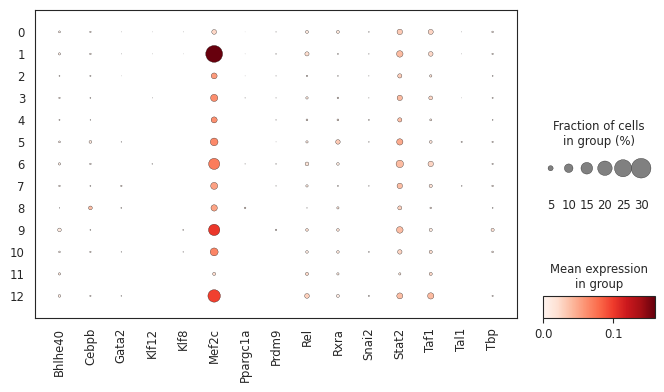

In [31]:
%matplotlib inline
sc.pl.dotplot(adata, var_names=regulators, groupby='cluster', figsize=(8, 4))

In [32]:
from spaceoracle.models.estimators import GeoCNNEstimator

In [33]:
estimator = GeoCNNEstimator()

In [34]:
X = adata.to_df()[regulators]
X

Bhlhe40  Cebpb  Gata2  Klf12  Klf8  Mef2c  Ppargc1a  Prdm9  \
AAAAAAAACCAACA      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
AAAAAAAGCCAACA      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
AAAAAACGGTAGAT      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
AAAAAACGTGCGCC      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
AAAAAATCCGGCGA      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
...                 ...    ...    ...    ...   ...    ...       ...    ...   
TTTTTTTATGGTAC      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
TTTTTTTGTCGCCT      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
TTTTTTTTATTATA      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
TTTTTTTTGCTTTA      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   
TTTTTTTTTAGCTC      0.0    0.0    0.0    0.0   0.0    0.0       0.0    0.0   

                     Rel      Rxra  Snai2  Stat2  Taf1  Tal1  Tbp  
AAAAAAAACCAACA  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
AAAAAAAGCCAACA  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
AAAAAACGGTAGAT  0.000000  0.959182    0.0    0.0   0.0   0.0  0.0  
AAAAAACGTGCGCC  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
AAAAAATCCGGCGA  0.923781  0.000000    0.0    0.0   0.0   0.0  0.0  
...                  ...       ...    ...    ...   ...   ...  ...  
TTTTTTTATGGTAC  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
TTTTTTTGTCGCCT  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
TTTTTTTTATTATA  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
TTTTTTTTGCTTTA  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  
TTTTTTTTTAGCTC  0.000000  0.000000    0.0    0.0   0.0   0.0  0.0  

[25074 rows x 15 columns]

In [35]:
y = adata.to_df()[[target_gene]]
y

Cd74
AAAAAAAACCAACA  0.000000
AAAAAAAGCCAACA  0.000000
AAAAAACGGTAGAT  0.959182
AAAAAACGTGCGCC  0.000000
AAAAAATCCGGCGA  0.000000
...                  ...
TTTTTTTATGGTAC  1.147065
TTTTTTTGTCGCCT  0.000000
TTTTTTTTATTATA  0.000000
TTTTTTTTGCTTTA  0.783095
TTTTTTTTTAGCTC  1.225175

[25074 rows x 1 columns]

In [36]:
xy = adata.obsm['spatial']
xy

ArrayView([[-1931. ,  4539. ],
           [-1255. ,  3184. ],
           [-4252. ,  2626.2],
           ...,
           [-1936.5,  1873.5],
           [-4295.6,  2514.8],
           [-2467.6,  4002.5]])

In [ ]:
estimator.fit(X.values, y.values, xy, init_betas='ols', max_epochs=300)

MSE: 0.2707 / [0.3701 | 0.7853]:  67%|██████▋   | 201/300 [06:18<03:07,  1.90s/it]

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams['figure.dpi'] = 100
plt.plot(estimator.losses)
plt.show()

In [ ]:
betas, y_pred = estimator.get_betas(X[:].values, xy[:])

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(x=y.values.reshape(-1), y=y_pred.reshape(-1), s=2)
plt.xlim(y.values.min(), y.values.max())
plt.ylim(y.values.min(), y.values.max())
plt.show()

In [ ]:
betas.shape

In [ ]:
f, axs = plt.subplots(2, 7, figsize=(20, 8), dpi=120, sharex=True, sharey=True)
axs = axs.flatten()

scatter_plots = []

for i in range(len(axs)): 
    scatter = sns.scatterplot(x=adata.obsm['spatial'][:, 0][:], y=adata.obsm['spatial'][:][:, 1], 
                s=10, c=betas[:, i+1], cmap='rainbow', ax=axs[i], edgecolor='black', linewidth=0.1)
    scatter_plots.append(scatter)

beta_means = list(betas.mean(0))
for ix, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{regulators[ix]}\n{beta_means[ix+1]:.3f} | {estimator.beta_init[ix]:.3f}')

# Adjust the layout to make space for the colorbar
plt.tight_layout()
f.subplots_adjust(bottom=0.2)

# Add a colorbar
cbar_ax = f.add_axes([0.1, 0.05, 0.8, 0.02])
colorbar = f.colorbar(scatter_plots[0].collections[0], cax=cbar_ax, orientation='horizontal')

plt.show()